## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [15]:
import pandas as pd
df = pd.read_csv("titanic.csv")  

print(df.head())  
print(df.describe())  
print(df.dtypes)  
print(df.isnull().sum())  
print(f"Dataset shape: {df.shape}")


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [ ]:
import pandas as pd
file_path = "titanic.csv"
dataset = pd.read_csv(file_path)

missing_values = dataset.isnull().sum()

print("Кількість пропущених значень по кожному атрибуту:")
print(missing_values)


Кількість пропущених значень по кожному атрибуту:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: Найбільше пропусків у колонці Cabin, що може свідчити про відсутність окремих кают у деяких пасажирів, а значна кількість пропущених значень у Age вказує на неповні дані щодо віку.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



Матриця кореляції:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


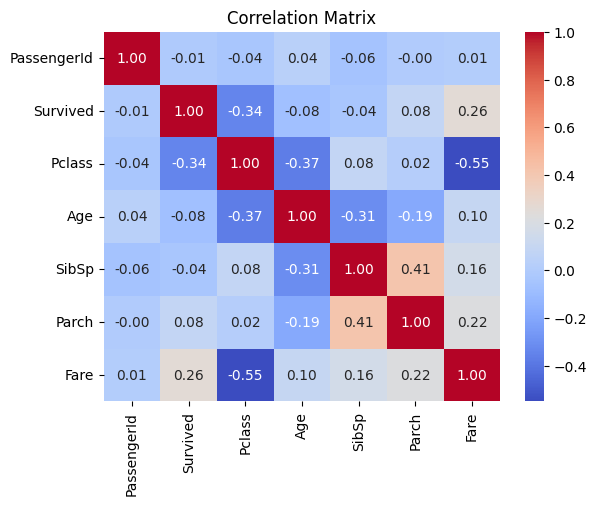

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv").select_dtypes("number")

corr_matrix = df.corr(method="pearson")
print("Матриця кореляції:")
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Ваші висновки: Дорожчий квиток злегка підвищував шанс вижити, а Age та Survived мають незначну кореляцію (~ -0.08), тобто вік практично не впливав на виживання.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [37]:
import pandas as pd

df = pd.read_csv("titanic.csv")

df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))

print(df.groupby(["Pclass", "Sex"])["Age"].median())

print("Age:", df["Age"].isnull().sum())


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64
Age: 0


Ваші висновки: Заповнив пропущені значення Age медіаною за групами класу , де є 0 немає пропусків

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\asus\AppData\Local\Temp\ipykernel_2088\130722755.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivors_count = df[df["Survived"] == 1].groupby("Age_bin").size().sort_index()


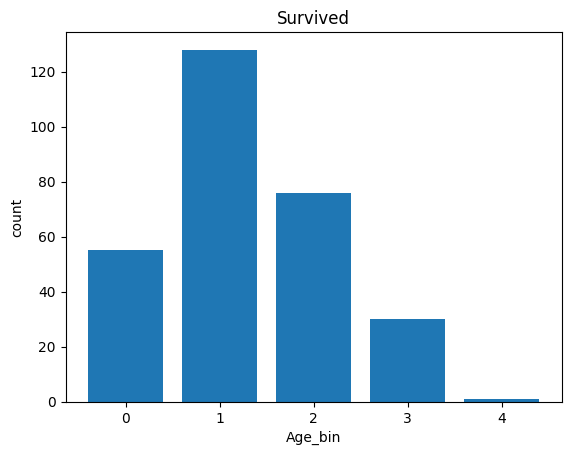

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("titanic.csv")

bins = np.linspace(0, 80, 6) 
labels = [0, 1, 2, 3, 4]
df["Age_bin"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

survivors_count = df[df["Survived"] == 1].groupby("Age_bin").size().sort_index()

plt.bar(survivors_count.index.astype(str), survivors_count.values)
plt.xlabel("Age_bin")
plt.ylabel("count")
plt.title("Survived")
plt.show()


Ваші висновки: У розбитті на п’ять вікових категорій  відповідно вижили 52, 138, 64, 27 та 5 пасажирів, що свідчить про вищий рівень виживання у молодших вікових групах.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

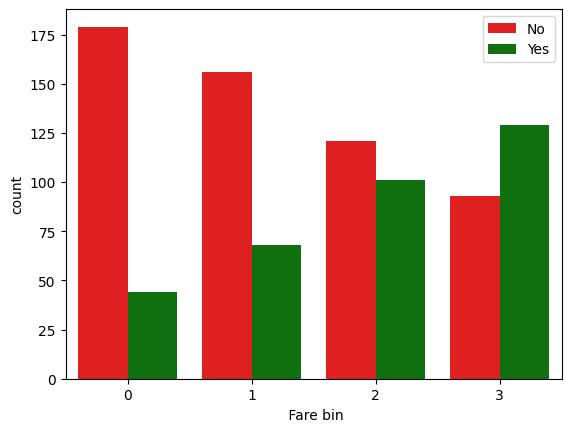

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

df["Fare_bin"] = pd.qcut(df["Fare"], 4, labels=range(4))

sns.countplot(data=df, x="Fare_bin", hue="Survived", palette=["red", "green"])
plt.legend(["No", "Yes"])
plt.xlabel(" Fare bin")
plt.ylabel("count")
plt.show()


Ваші висновки: Розбиття вартості квитків на 4 категорії (від 0 — найдешевші до 3 — найдорожчі) демонструє, що зі зростанням ціни квитка шанси на виживання зростають.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

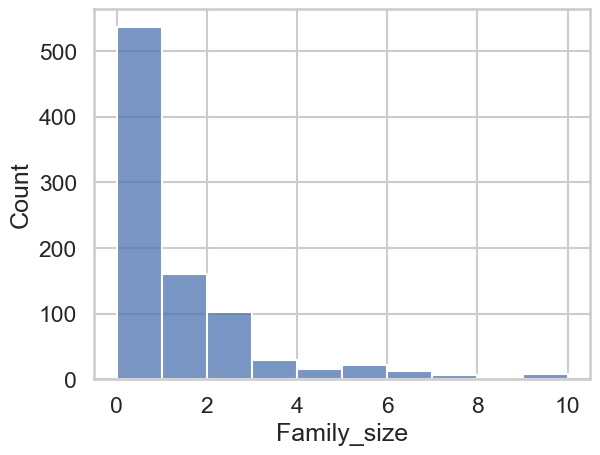

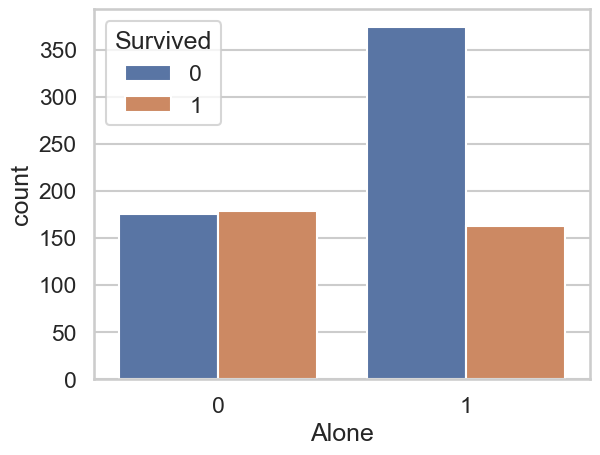

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df["Family_size"] = df["Parch"] + df["SibSp"]
df["Alone"] = (df["Family_size"] == 0).astype(int)

sns.histplot(df["Family_size"], bins=10)
plt.show()

sns.countplot(data=df, x="Alone", hue="Survived")
plt.show()


Ваші висновки: Family_size показує кількість членів сім'ї (наприклад, 1 – 520 пасажирів, 2 – 180), а Alone (1 – 520, 0 – 340) вказує, чи пасажир подорожував сам чи ні.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [4]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
print(df.head())
print(df.shape)



   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
(891, 8)


Ваші висновки: Видалино нерелевантні і неповні колонки й залишилилось 8 стовпців і 891 записів

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [ ]:
import pandas as pd

df = pd.read_csv("titanic.csv")

if "Title" not in df:
    df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.")

df["Sex"] = df["Sex"].astype("category").cat.codes
df["Embarked"] = df["Embarked"].astype("category").cat.codes
df["Title"] = df["Title"].astype("category").cat.codes

print(df[["Sex", "Embarked", "Title"]].head())


   Sex  Embarked  Title
0    1         2     12
1    0         0     13
2    0         2      9
3    0         2     13
4    1         2     12


Ваші висновки: Embarked — числове відображення порту відправлення
Title — числове відображення титулу, вилученого з імені пасажира







***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



C:\Users\asus\AppData\Local\Temp\ipykernel_19120\774861816.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", ax=ax)
C:\Users\asus\AppData\Local\Temp\ipykernel_19120\774861816.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", ax=ax)
C:\Users\asus\AppData\Local\Temp\ipykernel_19120\774861816.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel", ax=ax)
C:\Users\asus\AppData\Local\Temp\ipykernel_19120\774861816.py:19: FutureWarning: 


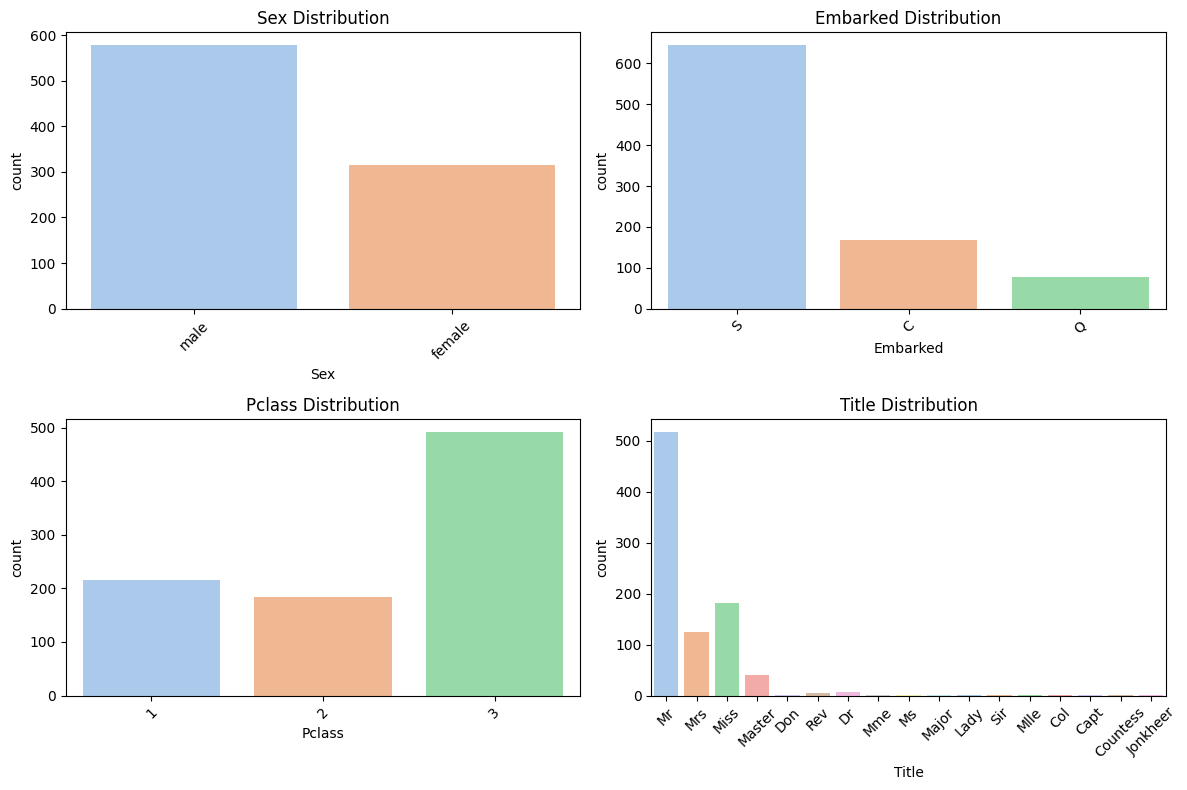

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")

if "Title" not in df:
    df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.")

cat_cols = ["Sex", "Embarked", "Pclass", "Title"]
cat_cols = [col for col in cat_cols if col in df]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, palette="pastel", ax=ax)
    ax.set_title(f"{col} Distribution")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Ваші висновки: Переважають чоловіки, найчастіше з порту "S" та у третьому класі, а найпоширеніші титули — Mr і Miss.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

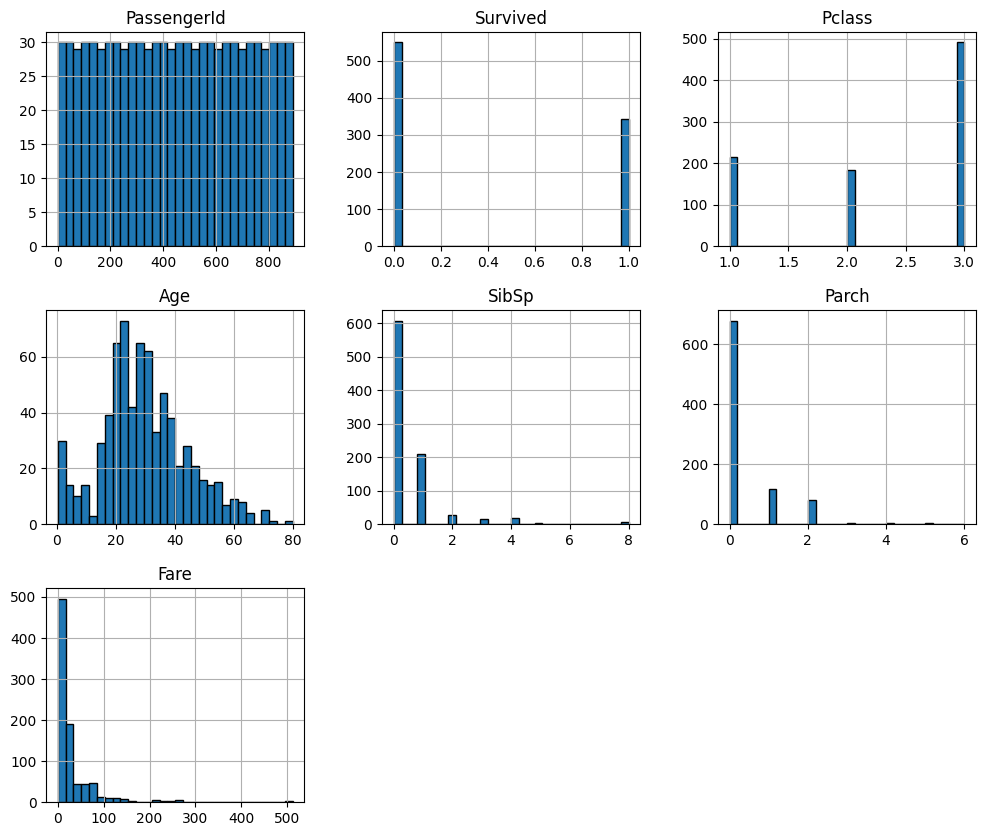

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.show()


Ваші висновки:  Більшість пасажирів мають невисокі значення Fare, а Age здебільшого зосереджений у межах 20–40 років, тоді як SibSp та Parch часто дорівнюють нулю, що вказує на невеликі сім’ї.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

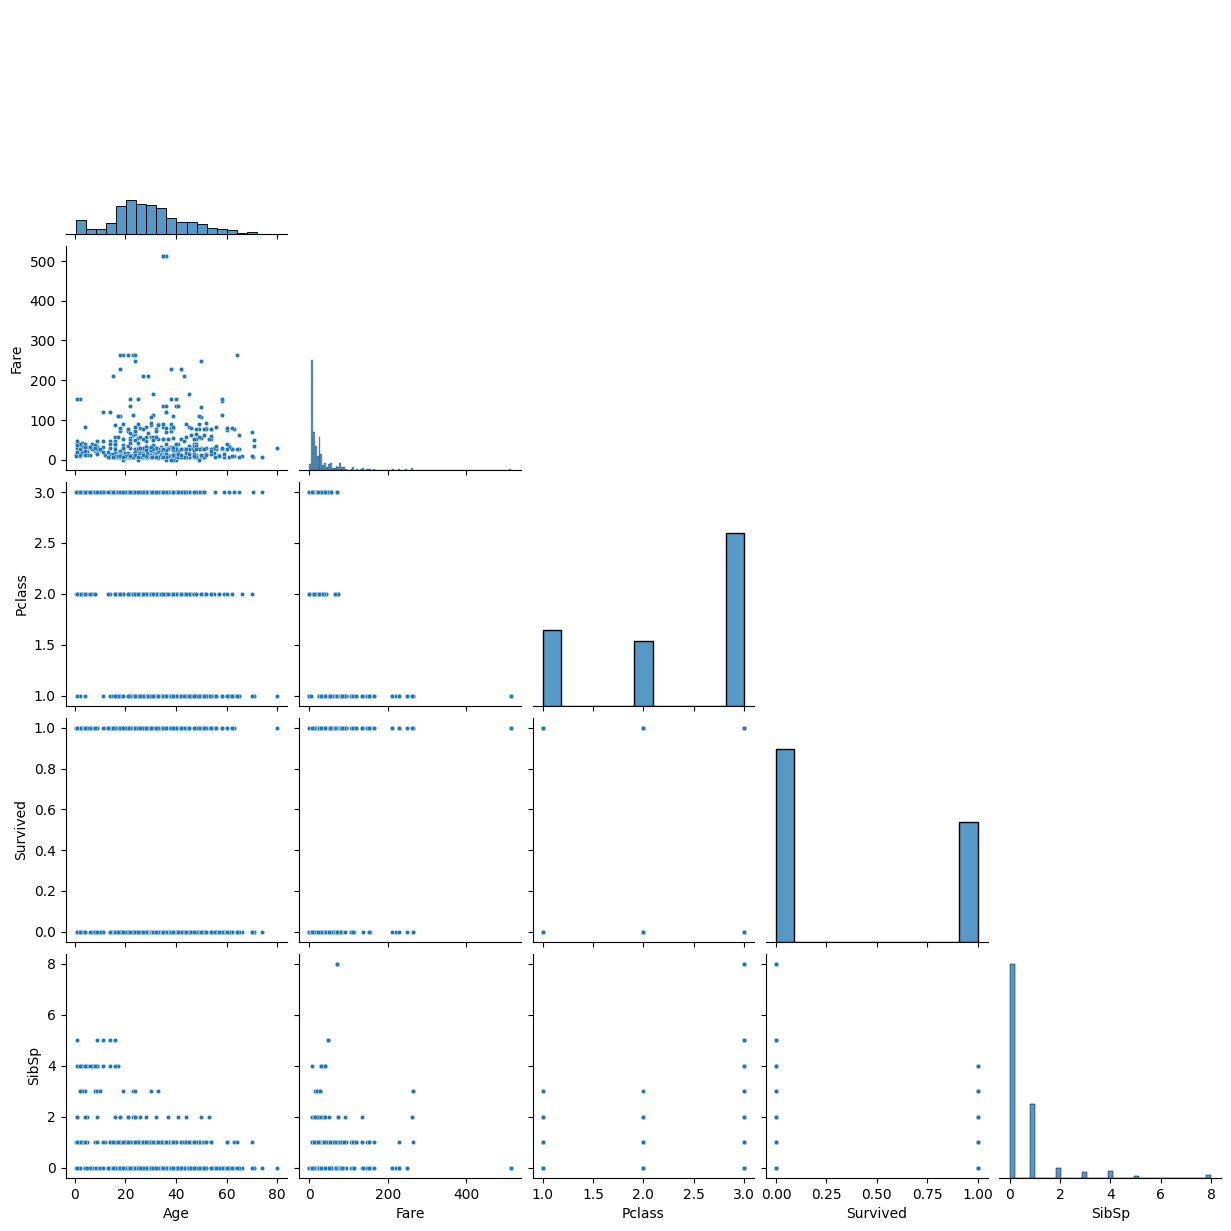

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")
num_cols = ["Age", "Fare", "Pclass", "Survived", "SibSp"]
sns.pairplot(df[num_cols], diag_kind="hist", plot_kws={"s": 10}, corner=True)
plt.show()


Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.